In [127]:
# Manejo de datos
import pandas as pd

# Modelos de Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Clasificación multietiqueta
from sklearn.multioutput import MultiOutputClassifier

# Preprocesamiento
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Oversampling
from imblearn.over_sampling import SMOTE,SMOTETomek

# Evaluación de modelos
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV, train_test_split, ParameterGrid

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt


In [128]:
songs = pd.read_csv('./data/spotify.csv')
spotify_blues = pd.read_csv('./data/spotify_blues.csv')
spotify_country = pd.read_csv('./data/spotify_country.csv')
spotify_electronic = pd.read_csv('./data/spotify_electronic.csv')
spotify_hip_hop = pd.read_csv('./data/spotify_hip_hop.csv')
spotify_jazz = pd.read_csv('./data/spotify_jazz.csv')
spotify_pop = pd.read_csv('./data/spotify_pop.csv')
spotify_rap = pd.read_csv('./data/spotify_rap.csv')
spotify_reggae = pd.read_csv('./data/spotify_reggae.csv')
spotify_rnb = pd.read_csv('./data/spotify_rnb.csv')
spotify_rock = pd.read_csv('./data/spotify_rock.csv')
spotify_mix= pd.read_csv('./data/spotify.csv')


In [129]:
songs_original = pd.concat([songs, spotify_blues, spotify_country, spotify_electronic, 
                       spotify_hip_hop, spotify_jazz, spotify_pop, 
                       spotify_rap, spotify_reggae, spotify_rnb, spotify_rock,
                       spotify_mix], 
                      ignore_index=True)

In [130]:
songs=songs_original.copy()
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             2842 non-null   object 
 1   Genre             2842 non-null   object 
 2   Artist            2842 non-null   object 
 3   id                2842 non-null   object 
 4   title_spotify     2842 non-null   object 
 5   album             2842 non-null   object 
 6   sp_popularity     2842 non-null   float64
 7   colab             2842 non-null   object 
 8   release_date      2842 non-null   object 
 9   danceability      2842 non-null   float64
 10  energy            2842 non-null   float64
 11  loudness          2842 non-null   float64
 12  speechiness       2842 non-null   float64
 13  acousticness      2842 non-null   float64
 14  instrumentalness  2842 non-null   float64
 15  liveness          2842 non-null   float64
 16  valence           2842 non-null   float64


**Colab está en Y o N que pase a booleano**

In [131]:
songs['release_date'] = pd.to_datetime(songs['release_date'], errors='coerce')
songs['colab'] = songs['colab'].replace({'Y': True, 'N': False})

/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_35583/1601697439.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  songs['colab'] = songs['colab'].replace({'Y': True, 'N': False})


In [132]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Title             2842 non-null   object        
 1   Genre             2842 non-null   object        
 2   Artist            2842 non-null   object        
 3   id                2842 non-null   object        
 4   title_spotify     2842 non-null   object        
 5   album             2842 non-null   object        
 6   sp_popularity     2842 non-null   float64       
 7   colab             2842 non-null   bool          
 8   release_date      2597 non-null   datetime64[ns]
 9   danceability      2842 non-null   float64       
 10  energy            2842 non-null   float64       
 11  loudness          2842 non-null   float64       
 12  speechiness       2842 non-null   float64       
 13  acousticness      2842 non-null   float64       
 14  instrumentalness  2842 n

In [133]:
songs.dropna(inplace=True)
songs.reset_index(drop=True, inplace=True)

In [134]:
songs = pd.get_dummies(songs, columns=['Genre'], drop_first=True)
songs.reset_index(drop=True, inplace=True)

In [135]:
songs.columns

Index(['Title', 'Artist', 'id', 'title_spotify', 'album', 'sp_popularity',
       'colab', 'release_date', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'key', 'mode', 'tempo', 'duration', 'Genre_Country',
       'Genre_Electronic', 'Genre_Hip Hop', 'Genre_Jazz', 'Genre_Pop',
       'Genre_R&B', 'Genre_Rap', 'Genre_Reggae', 'Genre_Rock',
       'Genre_alternative', 'Genre_blues', 'Genre_classical', 'Genre_country',
       'Genre_disco', 'Genre_electronic', 'Genre_folk', 'Genre_hip hop',
       'Genre_house', 'Genre_indie', 'Genre_jazz', 'Genre_latin',
       'Genre_metal', 'Genre_pop', 'Genre_punk', 'Genre_r&b', 'Genre_reggae',
       'Genre_rock', 'Genre_ska', 'Genre_soul'],
      dtype='object')

In [136]:
songs.drop(columns=['Genre_classical'], inplace=True)

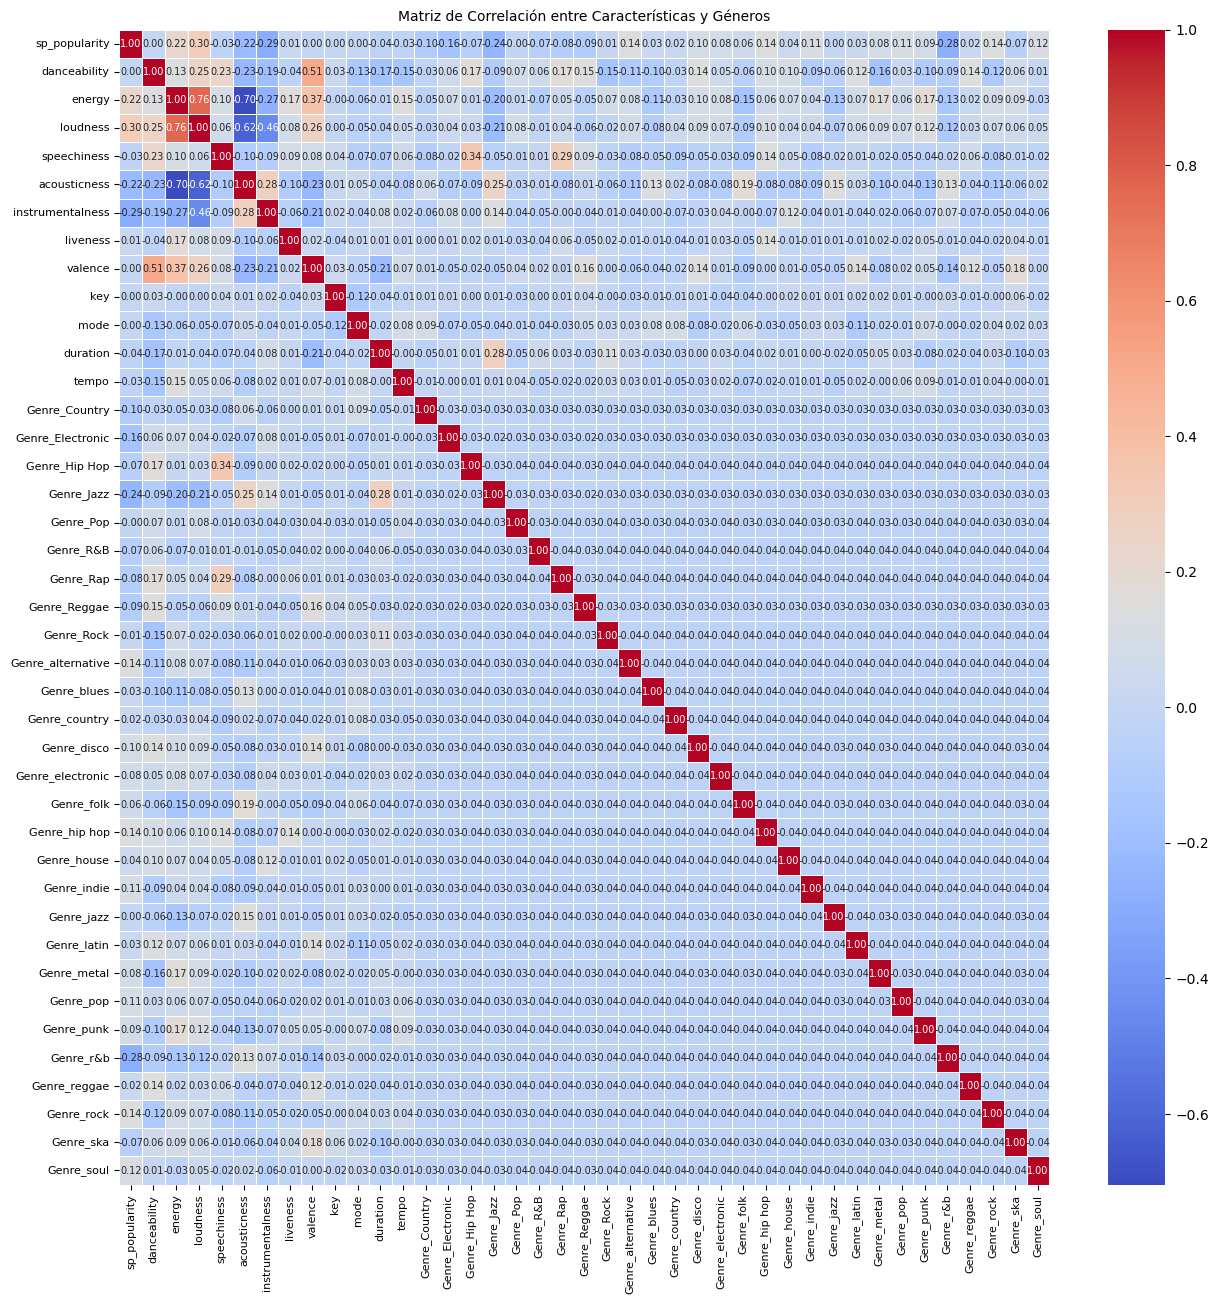

In [137]:
numerical_features = ['sp_popularity', 'danceability', 'energy','loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','key','mode','duration', 'tempo']

# Variables de género (todas son binarias: True/False)
genre_columns = [col for col in songs.columns if col.startswith('Genre_')]

# Filtrar las columnas relevantes para la correlación
columns_to_correlate = numerical_features + genre_columns

# Crear una matriz de correlación entre estas columnas
corr_matrix = songs[columns_to_correlate].corr()

# Crear un heatmap para visualizar la matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True,fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 7})  # "annot_kws" controla el tamaño de las anotaciones
plt.xticks(fontsize=8)  # Cambiar el tamaño de la fuente en las etiquetas del eje X
plt.yticks(fontsize=8)  # Cambiar el tamaño de la fuente en las etiquetas del eje Y
plt.title('Matriz de Correlación entre Características y Géneros', fontsize=10)

plt.show()

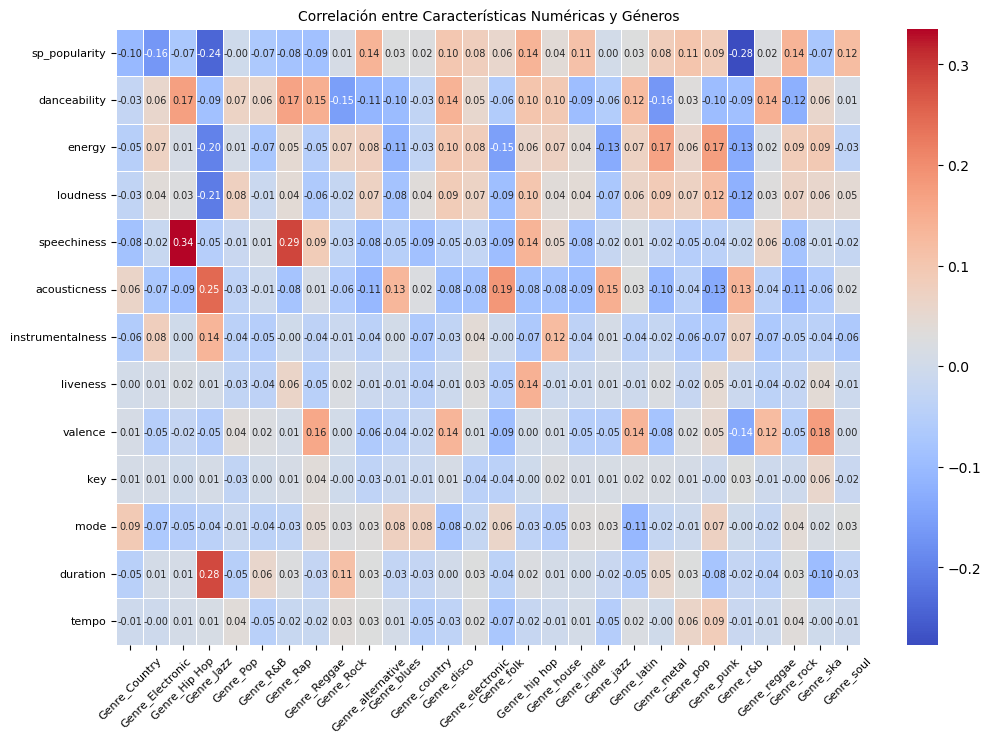

In [138]:

# Seleccionar las columnas numéricas y los géneros
numerical_features = ['sp_popularity', 'danceability', 'energy','loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','key','mode','duration', 'tempo']
genre_columns = [col for col in songs.columns if col.startswith('Genre_')]

# Filtrar las columnas relevantes para la correlación (numéricas y géneros)
columns_to_correlate = numerical_features + genre_columns

# Crear la matriz de correlación entre características numéricas y géneros
corr_matrix = songs[columns_to_correlate].corr()

# Filtrar para mostrar solo las correlaciones entre las características numéricas y los géneros
corr_genres = corr_matrix.loc[numerical_features, genre_columns]

# Crear un heatmap para visualizar la matriz de correlación
plt.figure(figsize=(12, 8))

# Aplicar formato para mostrar solo 2 decimales en las anotaciones
sns.heatmap(corr_genres, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 7})
plt.xticks(fontsize=8, rotation=45)  # Cambiar el tamaño y rotación de las etiquetas del eje X
plt.yticks(fontsize=8)  # Cambiar el tamaño de las etiquetas del eje Y
plt.title('Correlación entre Características Numéricas y Géneros', fontsize=10)

plt.show()


In [139]:
target_columns = [col for col in songs.columns if col.startswith('Genre_')]

X = songs[['sp_popularity', 'danceability', 'energy','loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','key','mode','duration', 'tempo']]
y = songs[[col for col in songs.columns if col.startswith('Genre_')]]

X = X.dropna()
y = y.dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear el modelo de KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos

# MultiOutputClassifier para manejar varios targets (géneros)
multi_target_knn = MultiOutputClassifier(knn)

# Entrenar el modelo
multi_target_knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = multi_target_knn.predict(X_test)

# Evaluar el desempeño
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo multietiqueta KNN: {accuracy:.4f}")

Precisión del modelo multietiqueta KNN: 0.0923


In [140]:
for genre in y.columns:
    model = LogisticRegression(max_iter=2000)  
    model.fit(X_train, y_train[genre])
    
    # Hacer predicciones
    predictions = model.predict(X_test)
    
    # Imprimir el reporte de clasificación para cada género
    print(f"Reporte de clasificación para {genre}:")
    print(classification_report(y_test[genre], predictions))

Reporte de clasificación para Genre_Country:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       508
        True       0.00      0.00      0.00        12

    accuracy                           0.98       520
   macro avg       0.49      0.50      0.49       520
weighted avg       0.95      0.98      0.97       520

Reporte de clasificación para Genre_Electronic:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       506
        True       0.50      0.07      0.12        14

    accuracy                           0.97       520
   macro avg       0.74      0.53      0.56       520
weighted avg       0.96      0.97      0.96       520



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

Reporte de clasificación para Genre_Hip Hop:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       498
        True       1.00      0.05      0.09        22

    accuracy                           0.96       520
   macro avg       0.98      0.52      0.53       520
weighted avg       0.96      0.96      0.94       520



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

Reporte de clasificación para Genre_Jazz:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       510
        True       0.60      0.30      0.40        10

    accuracy                           0.98       520
   macro avg       0.79      0.65      0.70       520
weighted avg       0.98      0.98      0.98       520

Reporte de clasificación para Genre_Pop:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       504
        True       0.00      0.00      0.00        16

    accuracy                           0.97       520
   macro avg       0.48      0.50      0.49       520
weighted avg       0.94      0.97      0.95       520

Reporte de clasificación para Genre_R&B:


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       False       0.97      1.00      0.98       504
        True       0.00      0.00      0.00        16

    accuracy                           0.97       520
   macro avg       0.48      0.50      0.49       520
weighted avg       0.94      0.97      0.95       520

Reporte de clasificación para Genre_Rap:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       502
        True       0.00      0.00      0.00        18

    accuracy                           0.96       520
   macro avg       0.48      0.50      0.49       520
weighted avg       0.93      0.96      0.95       520



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

Reporte de clasificación para Genre_Reggae:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       505
        True       0.00      0.00      0.00        15

    accuracy                           0.97       520
   macro avg       0.49      0.50      0.49       520
weighted avg       0.94      0.97      0.96       520



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

Reporte de clasificación para Genre_Rock:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       500
        True       0.00      0.00      0.00        20

    accuracy                           0.96       520
   macro avg       0.48      0.50      0.49       520
weighted avg       0.92      0.96      0.94       520



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

Reporte de clasificación para Genre_alternative:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       509
        True       0.00      0.00      0.00        11

    accuracy                           0.98       520
   macro avg       0.49      0.50      0.49       520
weighted avg       0.96      0.98      0.97       520

Reporte de clasificación para Genre_blues:
              precision    recall  f1-score   support

       False       0.95      1.00      0.98       496
        True       0.00      0.00      0.00        24

    accuracy                           0.95       520
   macro avg       0.48      0.50      0.49       520
weighted avg       0.91      0.95      0.93       520



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Reporte de clasificación para Genre_country:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       502
        True       0.00      0.00      0.00        18

    accuracy                           0.97       520
   macro avg       0.48      0.50      0.49       520
weighted avg       0.93      0.97      0.95       520



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

Reporte de clasificación para Genre_disco:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       503
        True       0.00      0.00      0.00        17

    accuracy                           0.97       520
   macro avg       0.48      0.50      0.49       520
weighted avg       0.94      0.97      0.95       520



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

Reporte de clasificación para Genre_electronic:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       501
        True       0.00      0.00      0.00        19

    accuracy                           0.96       520
   macro avg       0.48      0.50      0.49       520
weighted avg       0.93      0.96      0.95       520

Reporte de clasificación para Genre_folk:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       502
        True       0.00      0.00      0.00        18

    accuracy                           0.97       520
   macro avg       0.48      0.50      0.49       520
weighted avg       0.93      0.97      0.95       520



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

Reporte de clasificación para Genre_hip hop:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       504
        True       0.00      0.00      0.00        16

    accuracy                           0.97       520
   macro avg       0.48      0.50      0.49       520
weighted avg       0.94      0.97      0.95       520



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

Reporte de clasificación para Genre_house:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       498
        True       0.00      0.00      0.00        22

    accuracy                           0.96       520
   macro avg       0.48      0.50      0.49       520
weighted avg       0.92      0.96      0.94       520



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

Reporte de clasificación para Genre_indie:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       505
        True       0.00      0.00      0.00        15

    accuracy                           0.97       520
   macro avg       0.49      0.50      0.49       520
weighted avg       0.94      0.97      0.96       520

Reporte de clasificación para Genre_jazz:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       499
        True       0.00      0.00      0.00        21

    accuracy                           0.96       520
   macro avg       0.48      0.50      0.49       520
weighted avg       0.92      0.96      0.94       520



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

Reporte de clasificación para Genre_latin:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       498
        True       0.00      0.00      0.00        22

    accuracy                           0.96       520
   macro avg       0.48      0.50      0.49       520
weighted avg       0.92      0.96      0.94       520

Reporte de clasificación para Genre_metal:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       499
        True       0.00      0.00      0.00        21

    accuracy                           0.96       520
   macro avg       0.48      0.50      0.49       520
weighted avg       0.92      0.96      0.94       520



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

Reporte de clasificación para Genre_pop:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       511
        True       0.00      0.00      0.00         9

    accuracy                           0.98       520
   macro avg       0.49      0.50      0.50       520
weighted avg       0.97      0.98      0.97       520

Reporte de clasificación para Genre_punk:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       503
        True       1.00      0.06      0.11        17

    accuracy                           0.97       520
   macro avg       0.98      0.53      0.55       520
weighted avg       0.97      0.97      0.96       520

Reporte de clasificación para Genre_r&b:
              precision    recall  f1-score   support

       False       0.95      1.00      0.98       496
        True       0.00      0.00      0.00        24

    accuracy                           0.95       520
   m

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

Reporte de clasificación para Genre_reggae:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       507
        True       0.00      0.00      0.00        13

    accuracy                           0.97       520
   macro avg       0.49      0.50      0.49       520
weighted avg       0.95      0.97      0.96       520

Reporte de clasificación para Genre_rock:
              precision    recall  f1-score   support

       False       0.95      1.00      0.98       496
        True       0.00      0.00      0.00        24

    accuracy                           0.95       520
   macro avg       0.48      0.50      0.49       520
weighted avg       0.91      0.95      0.93       520



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

Reporte de clasificación para Genre_ska:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98       501
        True       0.00      0.00      0.00        19

    accuracy                           0.96       520
   macro avg       0.48      0.50      0.49       520
weighted avg       0.93      0.96      0.95       520

Reporte de clasificación para Genre_soul:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       504
        True       0.00      0.00      0.00        16

    accuracy                           0.97       520
   macro avg       0.48      0.50      0.49       520
weighted avg       0.94      0.97      0.95       520



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [141]:
# Crear y entrenar el modelo de Random Forest
for genre in y.columns:
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train[genre])
    
    # Hacer predicciones
    predictions = model.predict(X_test)
    
    # Imprimir el reporte de clasificación para cada género
    print(f"Reporte de clasificación para {genre}:")
    print(classification_report(y_test[genre], predictions))

Reporte de clasificación para Genre_Country:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       508
        True       0.00      0.00      0.00        12

    accuracy                           0.97       520
   macro avg       0.49      0.50      0.49       520
weighted avg       0.95      0.97      0.96       520

Reporte de clasificación para Genre_Electronic:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       506
        True       1.00      0.14      0.25        14

    accuracy                           0.98       520
   macro avg       0.99      0.57      0.62       520
weighted avg       0.98      0.98      0.97       520

Reporte de clasificación para Genre_Hip Hop:
              precision    recall  f1-score   support

       False       0.96      0.99      0.97       498
        True       0.00      0.00      0.00        22

    accuracy                           0.95 

KeyboardInterrupt: 

In [107]:
model = RandomForestClassifier(random_state=42)

# Definir los parámetros para GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_search.best_params_}")

Mejores parámetros: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [108]:
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = tree_model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.08      0.09        12
           1       0.27      0.21      0.24        14
           2       0.00      0.00      0.00        22
           3       0.50      0.40      0.44        10
           4       0.14      0.06      0.09        16
           5       0.13      0.12      0.13        16
           6       0.12      0.17      0.14        18
           7       0.09      0.07      0.08        15
           8       0.20      0.05      0.08        20
           9       0.00      0.00      0.00        11
          10       0.67      0.67      0.67        24
          11       0.47      0.44      0.46        18
          12       0.75      0.71      0.73        17
          13       0.69      0.58      0.63        19
          14       0.79      0.83      0.81        18
          15       0.30      0.44      0.36        16
          16       0.61      0.50      0.55        22
          17       0.83    

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***PROBAMOS SIN DUMMIES***


In [109]:
songs_original

,Title,Genre,Artist,id,title_spotify,album,sp_popularity,colab,release_date,danceability,...,loudness,speechiness,acousticness,instrumentalness,liveness,valence,key,mode,tempo,duration
0,Feel Good Inc.,pop,Gorillaz,0d28khcov6AiegSCpG5TuT,Feel Good Inc.,Demon Days,82.0,N,2005-05-23,0.818,...,-6.679,0.1770,0.00836,0.002330,0.613,0.772,6.0,1.0,138.559,222640.0
1,Yellow,pop,Coldplay,3AJwUDP919kvQ9QcozQPxg,Yellow,Parachutes,89.0,N,2000-07-10,0.429,...,-7.227,0.0281,0.00239,0.000121,0.234,0.285,11.0,1.0,173.372,266773.0
2,Viva la Vida,pop,Coldplay,1mea3bSkSGXuIRvnydlB5b,Viva La Vida,Viva La Vida or Death and All His Friends,86.0,N,2008-05-26,0.486,...,-7.115,0.0287,0.09540,0.000003,0.109,0.417,5.0,0.0,138.015,242373.0
3,Poker Face,pop,Lady Gaga,5R8dQOPq8haW94K7mgERlO,Poker Face,The Fame,76.0,N,2008-01-01,0.851,...,-4.618,0.0787,0.11900,0.000002,0.121,0.774,4.0,1.0,119.001,237200.0
4,The Scientist,pop,Coldplay,75JFxkI2RXiU7L9VXzMkle,The Scientist,A Rush of Blood to the Head,85.0,N,2002-08-27,0.557,...,-7.224,0.0243,0.73100,0.000015,0.110,0.213,5.0,1.0,146.277,309600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,Fluorescent Adolescent,alternative,Arctic Monkeys,7e8utCy2JlSB8dRHKi49xM,Fluorescent Adolescent,Favourite Worst Nightmare (Standard Version),69.0,N,2007-04-24,0.646,...,-5.290,0.0288,0.00178,0.000023,0.144,0.821,6.0,0.0,112.115,173493.0
2838,Basket Case,alternative,Green Day,6L89mwZXSOwYl76YXfX13s,Basket Case,Dookie,82.0,N,1994-02-01,0.442,...,-3.205,0.0602,0.00293,0.000009,0.091,0.781,3.0,1.0,85.064,181533.0
2839,The Less I Know the Better,alternative,Tame Impala,6K4t31amVTZDgR3sKmwUJJ,The Less I Know The Better,Currents,84.0,N,2015-07-17,0.640,...,-4.083,0.0284,0.01150,0.006780,0.167,0.785,4.0,1.0,116.879,216320.0
2840,Summertime Sadness,alternative,Lana Del Rey,2dBwB667LHQkLhdYlwLUZK,Summertime Sadness,Born To Die - The Paradise Edition,66.0,N,2012-11-12,0.565,...,-6.826,0.0335,0.05420,0.000002,0.122,0.235,1.0,0.0,111.968,265427.0


In [142]:
songs_original = songs_original.dropna(subset=['Genre'])
songs_original['Genre'] = songs_original['Genre'].astype('category')

In [143]:
# Seleccionar las características numéricas
numerical_features = ['sp_popularity', 'danceability', 'energy','loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','key','mode','duration', 'tempo']  # Añade más características si es necesario
X = songs_original[numerical_features]

# El target (género), en formato categórico
y = songs_original['Genre']

# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Crear el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Random Forest: {accuracy:.4f}")

Precisión del modelo Random Forest: 0.4537


In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Blues       0.33      0.32      0.33        25
     Country       0.42      0.32      0.36        25
  Electronic       0.24      0.29      0.26        14
     Hip Hop       0.05      0.04      0.04        25
        Jazz       0.66      0.58      0.61        33
         Pop       0.00      0.00      0.00        26
         R&B       0.17      0.17      0.17        29
         Rap       0.19      0.21      0.20        28
      Reggae       0.36      0.38      0.37        21
        Rock       0.50      0.33      0.40        33
 alternative       0.03      0.04      0.03        23
       blues       0.60      0.58      0.59        36
   classical       0.88      1.00      0.93        21
     country       0.48      0.56      0.52        27
       disco       0.40      0.58      0.47        24
  electronic       0.47      0.36      0.41        39
        folk       0.58      0.81      0.68        27
     hip hop       0.35    

ajustamos el modelo porque hay desbalance de clases

In [145]:
# Seleccionar las características numéricas
numerical_features = ['sp_popularity', 'danceability', 'energy','loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','key','mode','duration', 'tempo']  # Añade más características si es necesario
X = songs_original[numerical_features]

# El target (género), en formato categórico
y = songs_original['Genre']

# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Crear el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Entrenar el modelo
rf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Random Forest: {accuracy:.4f}")

Precisión del modelo Random Forest: 0.4584


Vemos que va peor aún, vamos a probar con SMOTE para solucionar el desbalance

Además de SMOTE hemos acabado usando SMOTEomek para hacer undersampling de las clases mayoritarias 

In [146]:

smt = SMOTETomek(random_state=42)
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

# Crear el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos equilibrados por SMOTE
rf.fit(X_train_smote, y_train_smote)

# Hacer predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo con SMOTE: {accuracy:.4f}")

# Imprimir un informe de clasificación
print(classification_report(y_test, y_pred))

Precisión del modelo con SMOTE: 0.4642
              precision    recall  f1-score   support

       Blues       0.38      0.40      0.39        25
     Country       0.52      0.44      0.48        25
  Electronic       0.17      0.21      0.19        14
     Hip Hop       0.10      0.08      0.09        25
        Jazz       0.71      0.61      0.66        33
         Pop       0.27      0.12      0.16        26
         R&B       0.24      0.17      0.20        29
         Rap       0.14      0.14      0.14        28
      Reggae       0.41      0.52      0.46        21
        Rock       0.46      0.39      0.43        33
 alternative       0.03      0.04      0.03        23
       blues       0.58      0.61      0.59        36
   classical       0.84      1.00      0.91        21
     country       0.56      0.56      0.56        27
       disco       0.43      0.50      0.46        24
  electronic       0.48      0.38      0.43        39
        folk       0.61      0.85      0.7

Ha mejorado un poco, pero sigue siendo poco preciso


Probamos con XGBoost


In [119]:


# Codificar las etiquetas de los géneros (de texto a numérico)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Aplicar SMOTE para equilibrar las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Crear el modelo de XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Entrenar el modelo con los datos equilibrados por SMOTE
xgb_model.fit(X_train_smote, y_train_smote)

# Hacer predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Decodificar las predicciones para que se correspondan con los nombres originales de los géneros
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"Precisión del modelo XGBoost con SMOTE: {accuracy:.4f}")

# Imprimir un informe de clasificación
print(classification_report(y_test_decoded, y_pred_decoded))

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:32:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Precisión del modelo XGBoost con SMOTE: 0.4162
              precision    recall  f1-score   support

       Blues       0.50      0.40      0.44        25
     Country       0.27      0.32      0.29        25
  Electronic       0.20      0.14      0.17        14
     Hip Hop       0.04      0.04      0.04        25
        Jazz       0.57      0.39      0.46        33
         Pop       0.11      0.08      0.09        26
         R&B       0.22      0.17      0.19        29
         Rap       0.12      0.14      0.13        28
      Reggae       0.25      0.33      0.29        21
        Rock       0.25      0.15      0.19        33
 alternative       0.00      0.00      0.00        23
       blues       0.57      0.47      0.52        36
   classical       0.78      1.00      0.88        21
     country       0.53      0.59      0.56        27
       disco       0.47      0.58      0.52        24
  electronic       0.48      0.38      0.43        39
        folk       0.65      0.81 

Peor que el intento anterior, de momento el que nos ha dado mejores resultados ha sido Random Forest con SMOTE y SMOTETomek

In [122]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustar el modelo con los datos equilibrados por SMOTE
grid_search.fit(X_train_smote, y_train_smote)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

# Usar el mejor modelo
best_rf = grid_search.best_estimator_

# Hacer predicciones en el conjunto de prueba
y_pred_best = best_rf.predict(X_test)

# Evaluar el modelo optimizado
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Precisión del modelo Random Forest optimizado: {accuracy_best:.4f}")

# Imprimir un informe de clasificación
print(classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total tim